In [2]:
import os
import json
import pandas as pd
path = '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_31_din_12_cases/first_labels'
dicta = {}
heBERT = {}
alephBERT = {}
for folder in os.listdir(path):
    for model in os.listdir(os.path.join(path, folder)):
        for file in os.listdir(os.path.join(path, folder, model)):
            if file.endswith('.json'):
                with open(os.path.join(path, folder, model, file)) as f:
                    data = json.load(f)
                    #remove bestthreshold key from dict
                    if 'best_threshold' in data:
                        data.pop('best_threshold')
                    if model == 'heBERT':
                        heBERT[folder] = data
                    elif model == 'dictabert':
                        dicta[folder] = data
                    else:
                        alephBERT[folder] = data

path = '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_31_din_12_cases/second_labels'
for folder in os.listdir(path):
    if folder in ['CIR_AMMU_AMOUNT_WEP', 'CIR_MONEY_PAID_WEP']:
        dicta[folder] = {"precision": None, "recall": None, "f1": None, "f2": None,"AUC": None}
        heBERT[folder] = {"precision": None, "recall": None, "f1": None, "f2": None, "AUC": None}
        alephBERT[folder] = {"precision": None, "recall": None, "f1": None, "f2": None, "AUC": None}

    for model in os.listdir(os.path.join(path, folder)):
        for file in os.listdir(os.path.join(path, folder, model)):
            if file.endswith('.json'):
                with open(os.path.join(path, folder, model, file)) as f:
                    data = json.load(f)
                    #remove bestthreshold key from dict
                    if 'best_threshold' in data:
                        data.pop('best_threshold')
                    if model == 'heBERT':
                        heBERT[folder] = data
                    elif model == 'dictabert':
                        dicta[folder] = data
                    else:
                        alephBERT[folder] = data
# for each model make dataframe
dicta_df = pd.DataFrame(dicta)
heBERT_df = pd.DataFrame(heBERT)
alephBERT_df = pd.DataFrame(alephBERT)

#switch columns and rows
dicta_df = dicta_df.T
heBERT_df = heBERT_df.T
alephBERT_df = alephBERT_df.T

#save dataframes to csv
# שמירה של DataFrame עם 3 ספרות אחרי הנקודה
dicta_df.to_csv(
    '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_19_with_f2_try/dictabert.csv', 
    float_format='%.3f'
)

heBERT_df.to_csv(
    '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_19_with_f2_try/heBERT.csv', 
    float_format='%.3f'
)

alephBERT_df.to_csv(
    '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_19_with_f2_try/bert-multilingual.csv', 
    float_format='%.3f'
)


FileNotFoundError: [Errno 2] No such file or directory: '/home/tak/MOJ/results/evaluations/drugs/sentence_classification/03_31_din_12_cases/first_labels'

In [ ]:
import pandas as pd
path_to_tag = '/home/tak/MOJ/resources/data/tagging/drugs/gt/combined_output.csv'
columns = ['CIR_TYPE', 'CIR_AMOUNT', 'CIR_ROLE', 'CIR_EQ','CIR_PUNISHMENT']
# create new column that if in the columns above there is a value of 1 then the new column will be 1
df = pd.read_csv(path_to_tag)
df['CIRCUM_OFFENSE'] = df[columns].sum(axis=1)
df['CIRCUM_OFFENSE'] = df['CIRCUM_OFFENSE'].apply(lambda x: 1 if x > 0 else 0)
# path_to_tag = '/home/tak/MOJ/resources/data/tagging/drugs/gt/sentence_tagging.csv'
df.to_csv(path_to_tag, index=False)

In [2]:
import pandas as pd
df = pd.read_csv('/home/tak/MOJ/resources/data/tagging/weapon/gt/sentence_tagging.csv')
df.count()

Unnamed: 0.1           3719
Unnamed: 0             3719
verdict                3719
text                   3719
reject                 3719
CONFESSION             3719
CIR_TYPE_WEP           3719
CIR_HELD_WAY_WEP       3719
CIR_AMMU_AMOUNT_WEP    3719
CIR_PURPOSE            3719
GENERAL_CIRCUM         3719
CIR_STATUS_WEP         3719
REGRET                 3719
PUNISHMENT             3719
CIRCUM_OFFENSE         3719
CIR_PLANNING           3719
RESPO                  3719
CIR_OBTAIN_WAY_WEP     3719
CIR_USE                3179
CIR_BUYER_ID_WEP        918
CIR_MONEY_PAID_WEP     1360
dtype: int64

# graph classificaion

In [3]:
import pandas as pd
import os
import json
import numpy as np

In [4]:
columns = ['CIR_AMMU_AMOUNT_WEP','CIR_HELD_WAY_WEP','CIR_OBTAIN_WAY_WEP','CIR_PLANNING','CIR_PURPOSE','CIR_STATUS_WEP','CIR_TYPE_WEP','CIR_USE']
columns = [
    'CONFESSION',
    'CIR_TYPE_WEP', 
    'CIR_HELD_WAY_WEP', 
    'CIR_AMMU_AMOUNT_WEP',
    'CIR_PURPOSE',
    'GENERAL_CIRCUM',
    'CIR_STATUS_WEP',
    'REGRET',
    'PUNISHMENT',
    'CIR_PLANNING',
    'RESPO',
    'CIR_OBTAIN_WAY_WEP', 
    'CIR_USE'
]

In [63]:
columns = [
    'CONFESSION',
    'CIR_PUNISHMENT', 
    'CIR_TYPE', 
    'REGRET',
    'CIR_ROLE',
    'GENERAL_CIRCUM',
    'CIR_AMOUNT',
    'RESPO',
    'CIR_EQ'
]

In [5]:
path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/04_01_din_12_cases/second_labels'
predictions_no_clf = {}

for folder in os.listdir(path):
    if folder in columns:
        for model in os.listdir(os.path.join(path, folder)):
            if model == 'dictabert':
                for file in os.listdir(os.path.join(path, folder, model)):
                    if file.endswith('.json'):
                        with open(os.path.join(path, folder, model, file)) as f:
                            data = json.load(f)
                            #remove bestthreshold key from dict
                            if 'best_threshold' in data:
                                data.pop('best_threshold')
                            predictions_no_clf[folder] = data

path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/04_01_din_12_cases/predictions_with_clf_50'
predictions_with_clf = {}

for folder in os.listdir(path):
    if folder in columns:
        for model in os.listdir(os.path.join(path, folder)):
            if model == 'dictabert':
                for file in os.listdir(os.path.join(path, folder, model)):
                    if file.endswith('.json'):
                        with open(os.path.join(path, folder, model, file)) as f:
                            data = json.load(f)
                            #remove bestthreshold key from dict
                            if 'best_threshold' in data:
                                data.pop('best_threshold')
                            predictions_with_clf[folder] = data
 
path = '/home/tak/MOJ/results/evaluations/weapon/sentence_classification/04_01_din_12_cases/predictions_with_ground_truth_50'
predictions_ground_truth = {}

for folder in os.listdir(path):
    if folder in columns:
        for model in os.listdir(os.path.join(path, folder)):
            if model == 'dictabert':
                for file in os.listdir(os.path.join(path, folder, model)):
                    if file.endswith('.json'):
                        with open(os.path.join(path, folder, model, file)) as f:
                            data = json.load(f)
                            #remove bestthreshold key from dict
                            if 'best_threshold' in data:
                                data.pop('best_threshold')
                            predictions_ground_truth[folder] = data

In [6]:
import pandas as pd

# --- Assume these dictionaries are already created:
# predictions_no_clf = { ... }  # for Regular
# predictions_with_clf = { ... }  # for Hierarchy
# (predictions_ground_truth exists too, but isn’t used in this table)

# Define the desired row order (categories)
ordered_rows = [
    'CONFESSION',
    'CIR_TYPE_WEP', 
    'CIR_HELD_WAY_WEP', 
    'CIR_AMMU_AMOUNT_WEP',
    'CIR_PURPOSE',
    'GENERAL_CIRCUM', 
    'CIR_STATUS_WEP',
    'REGRET',
    'PUNISHMENT',
    'CIR_PLANNING',
    'RESPO' ,
    'CIR_OBTAIN_WAY_WEP', 
    'CIR_USE'
]

# Define the order of the metrics (columns)
metric_order = ['precision', 'recall', 'f1', 'f2', 'PRAUC']

# Create DataFrames from your dictionaries, using the folder names as the index
df_regular = pd.DataFrame.from_dict(predictions_no_clf, orient='index')
df_hierarchy = pd.DataFrame.from_dict(predictions_with_clf, orient='index')

# Reindex (order the rows) to match the desired order.
# This keeps only rows present in your DataFrame.
df_regular = df_regular.loc[[cat for cat in ordered_rows if cat in df_regular.index]]
df_hierarchy = df_hierarchy.loc[[cat for cat in ordered_rows if cat in df_hierarchy.index]]

# Reorder the columns (metrics) if needed
df_regular = df_regular[metric_order]
df_hierarchy = df_hierarchy[metric_order]

# Combine the two DataFrames side by side with MultiIndex columns:
combined_df = pd.concat([df_regular, df_hierarchy], axis=1, keys=['Regular', 'Hierarchy'])

# Display the combined table
combined_df


Regular                                          \
                    precision    recall        f1        f2     PRAUC   
CIR_TYPE_WEP         0.849315  0.892086  0.870175  0.883191  0.893844   
CIR_HELD_WAY_WEP     0.525253  0.776119  0.626506  0.708447  0.652852   
CIR_AMMU_AMOUNT_WEP  0.500000  0.574074  0.534483  0.557554  0.512983   
CIR_PURPOSE          0.393939  0.565217  0.464286  0.520000  0.289906   
CIR_STATUS_WEP       0.443478  0.796875  0.569832  0.687332  0.570204   
CIR_OBTAIN_WAY_WEP   0.085366  0.538462  0.147368  0.261194  0.061400   
CIR_USE              0.630435  0.527273  0.574257  0.545113  0.563029   
CIR_PLANNING              NaN       NaN       NaN       NaN       NaN   

                    Hierarchy                                          
                    precision    recall        f1        f2     PRAUC  
CIR_TYPE_WEP         0.776398  0.899281  0.833333  0.871688  0.859086  
CIR_HELD_WAY_WEP     0.514851  0.776119  0.619048  0.704607  0.649349  
CIR_AMMU_AMOUNT_WEP  0.270440  0.796296  0.403756  0.573333  0.537457  
CIR_PURPOSE          0.104651  0.782609  0.184615  0.340909  0.263835  
CIR_STATUS_WEP       0.388889  0.875000  0.538462  0.700000  0.595146  
CIR_OBTAIN_WAY_WEP   0.044053  0.769231  0.083333  0.179211  0.058585  
CIR_USE              0.290698  0.909091  0.440529  0.637755  0.557232  
CIR_PLANNING         0.000000  0.000000  0.000000  0.000000  0.012643

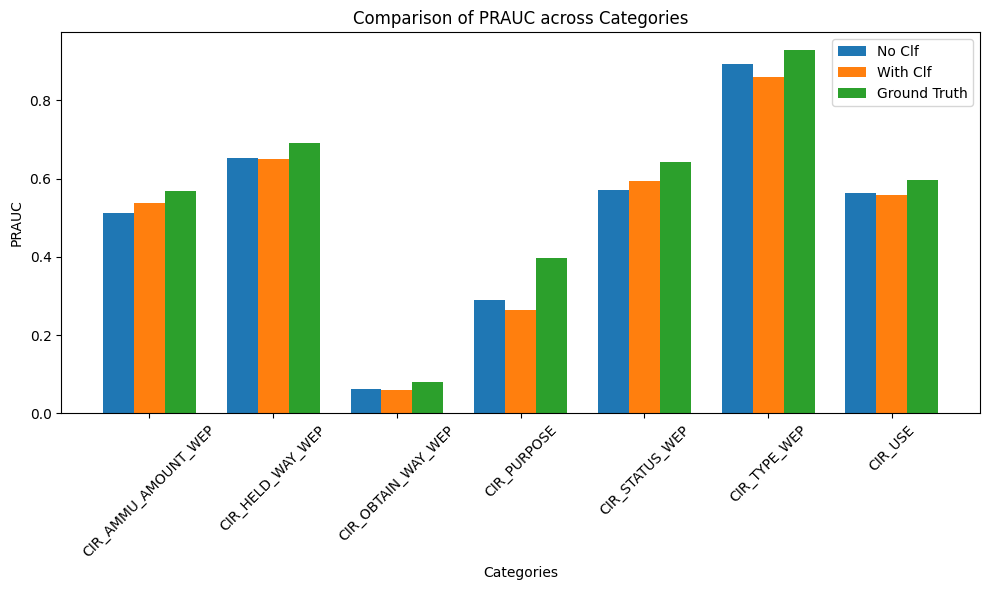

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_no_clf, df_with_clf, and df_ground_truth were created as follows:
df_no_clf = pd.DataFrame.from_dict(predictions_no_clf, orient='index')
df_with_clf = pd.DataFrame.from_dict(predictions_with_clf, orient='index')
df_ground_truth = pd.DataFrame.from_dict(predictions_ground_truth, orient='index')

# Combine the DataFrames into one with a MultiIndex for columns
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['No Clf', 'With Clf', 'Ground Truth'])

ordered_folders = ['CIR_AMMU_AMOUNT_WEP','CIR_HELD_WAY_WEP','CIR_OBTAIN_WAY_WEP',
                   'CIR_PLANNING','CIR_PURPOSE','CIR_STATUS_WEP','CIR_TYPE_WEP','CIR_USE']

# Ensure that you only select the rows that exist
ordered_folders = [folder for folder in ordered_folders if folder in df_no_clf.index]

df_no_clf = df_no_clf.loc[ordered_folders]
df_with_clf = df_with_clf.loc[ordered_folders]
df_ground_truth = df_ground_truth.loc[ordered_folders]

# Then combine them
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['No Clf', 'With Clf', 'Ground Truth'])
# Display the combined DataFrame (optional)
# print(df_all)

# Get a list of the metric names from one of the sub-dataframes
metrics = df_all['No Clf'].columns
# metrics = ['precision', 'recall', 'f1', 'f2', 'PRAUC']
metrics = ['PRAUC']

folders = df_all.index.tolist()

# Loop over each metric and create a grouped bar chart
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Set up the positions of the bars on the x-axis
    indices = np.arange(len(folders))
    width = 0.25  # width of each bar
    
    # Plot each set of predictions as bars
    plt.bar(indices - width, df_all['No Clf'][metric], width=width, label='No Clf')
    plt.bar(indices, df_all['With Clf'][metric], width=width, label='With Clf')
    plt.bar(indices + width, df_all['Ground Truth'][metric], width=width, label='Ground Truth')
    
    # Labeling the graph
    plt.xlabel("Categories")
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Categories")
    plt.xticks(indices, folders, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


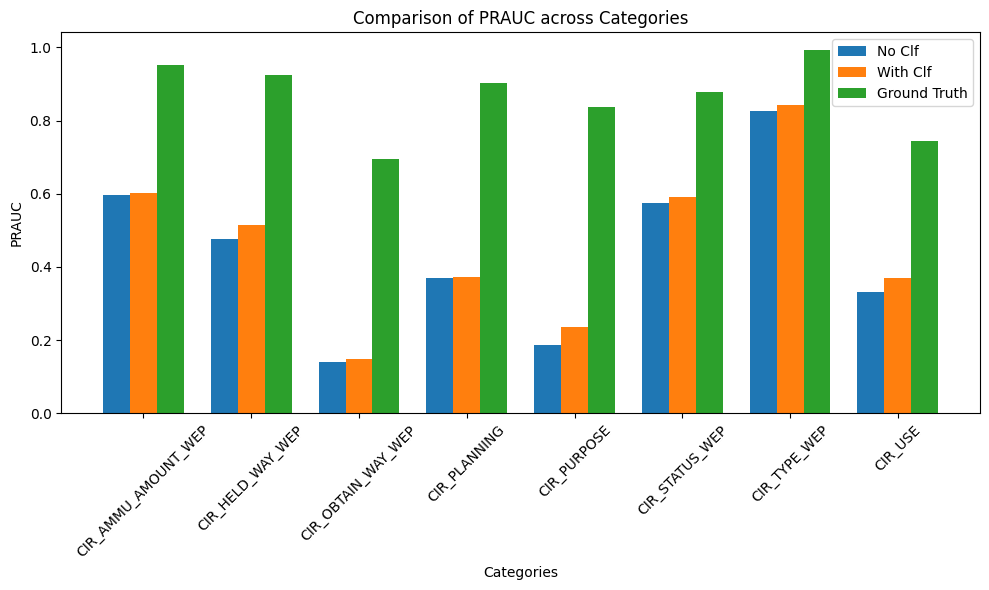

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_no_clf, df_with_clf, and df_ground_truth were created as follows:
df_no_clf = pd.DataFrame.from_dict(predictions_no_clf, orient='index')
df_with_clf = pd.DataFrame.from_dict(predictions_with_clf, orient='index')
df_ground_truth = pd.DataFrame.from_dict(predictions_ground_truth, orient='index')

# Combine the DataFrames into one with a MultiIndex for columns
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['No Clf', 'With Clf', 'Ground Truth'])

ordered_folders = ['CIR_AMMU_AMOUNT_WEP','CIR_HELD_WAY_WEP','CIR_OBTAIN_WAY_WEP',
                   'CIR_PLANNING','CIR_PURPOSE','CIR_STATUS_WEP','CIR_TYPE_WEP','CIR_USE']

# Ensure that you only select the rows that exist
ordered_folders = [folder for folder in ordered_folders if folder in df_no_clf.index]

df_no_clf = df_no_clf.loc[ordered_folders]
df_with_clf = df_with_clf.loc[ordered_folders]
df_ground_truth = df_ground_truth.loc[ordered_folders]

# Then combine them
df_all = pd.concat([df_no_clf, df_with_clf, df_ground_truth],
                   axis=1,
                   keys=['No Clf', 'With Clf', 'Ground Truth'])
# Display the combined DataFrame (optional)
# print(df_all)

# Get a list of the metric names from one of the sub-dataframes
metrics = df_all['No Clf'].columns
metrics = ['precision', 'recall', 'f1', 'f2', 'PRAUC']
metrics = ['PRAUC']

folders = df_all.index.tolist()

# Loop over each metric and create a grouped bar chart
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Set up the positions of the bars on the x-axis
    indices = np.arange(len(folders))
    width = 0.25  # width of each bar
    
    # Plot each set of predictions as bars
    plt.bar(indices - width, df_all['No Clf'][metric], width=width, label='No Clf')
    plt.bar(indices, df_all['With Clf'][metric], width=width, label='With Clf')
    plt.bar(indices + width, df_all['Ground Truth'][metric], width=width, label='Ground Truth')
    
    # Labeling the graph
    plt.xlabel("Categories")
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Categories")
    plt.xticks(indices, folders, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
